In [5]:
from minisom import MiniSom
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from matplotlib.patches import Patch

In [6]:
data =load_wine()
x = data.data
y=data.target
xScaled = (x - x.min()) / (x.max()- x.min())

In [8]:
model = MiniSom(x =9, y=9, input_len =x.shape[1],  sigma =9, learning_rate=0.6)
model.random_weights_init(xScaled)
model.train_random(xScaled,2000)

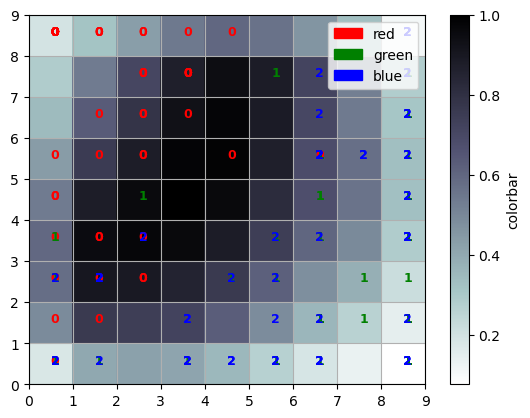

In [9]:
colors = ["red", "green", "blue"]
labels = [colors[i] for i in y]
plt.pcolor(model.distance_map().T,cmap="bone_r")
plt.colorbar(label="colorbar")

for idx, x in enumerate(xScaled):
    winner = model.winner(x)
    plt.text(winner[0]+0.5, winner[1]+0.5, str(y[idx]), color=labels[idx], fontdict={"weight":"bold", "size":9})
legend = [Patch(color=c, label=c) for c in colors]
plt.legend(handles=legend, loc="upper right")
plt.grid()

In [15]:
import numpy as np
import random

In [16]:
inputVec=[]
for i in range(5):
    temp=[]
    for j in range(4):
        temp.append(random.randint(0,1))
    inputVec.append(temp)

weights=[]
for i in range(4):
    temp=[]
    for j in range(4):
        temp.append(random.random()*10)
    weights.append(temp)

weights = np.array(weights)
inputVec = np.array(inputVec)
    
        

In [21]:
for ipv in inputVec:
    distance = []
    for j in weights:
        distance.append(sum((ipv-j)**2))
    #print(distance)
    val =min(distance)
    #print(val)
    winIdx = distance.index(val)
    weights[winIdx]+=ipv-weights[winIdx]

weights

array([[2.45062475, 9.09114993, 3.98755345, 4.10414844],
       [1.33009682, 7.55591103, 7.03687783, 9.12166274],
       [7.65282451, 2.61822517, 3.84149221, 6.08444358],
       [0.        , 0.        , 1.        , 1.        ]])